In [1]:
import numpy as np
from scipy.integrate import odeint

In [2]:
def two_body_eqm(_y, _t, _G, _m1, _m2):
    """
    differential equations of motion describing the two-body-problem
    _t: discrete time step value
    _y: state vector
    """
    # magnitude of position vector from r1 to r2
    r_mag = np.linalg.norm(_y[3:6] - _y[:3])
    c0 = _y[6:12]
    c1 = _G * _m2 * ((_y[3:6] - _y[:3]) / np.power(r_mag, 3))
    c2 = _G * _m1 * ((_y[:3] - _y[3:6]) / np.power(r_mag, 3))
    return np.concatenate((c0, c1, c2))

In [3]:
# ==============================================================
# simulation harness

# universal gravitation constant
# G = 6.67408e-11 (m**3/kg/s**2)
G = 6.67259e-20  # (km**3/kg/s**2)
#G = c.G

# time array
time = np.arange(0, 480, 0.5)

# body m1 initial conditions
m1 = 1e26  # mass (kg)
r10 = np.array([0, 0, 0])  # initial position (km)
v10 = np.array([10, 20, 30])  # initial velocity (km/s)

# body m2 initial conditions
m2 = 1e26  # mass (kg)
r20 = np.array([3000, 0, 0])  # initial position (km)
v20 = np.array([0, 40, 0])  # initial velocity (km/s)

# [X1 (0), Y1 (1), Z1 (2), X2 (3), Y2 (4), Z2 (5), 
#  VX1 (6), VY1 (7), VZ1 (8), VX2 (9), VY2 (10), VZ2 (11)]
y0 = np.concatenate((r10, r20, v10, v20))

In [4]:
y = odeint(two_body_eqm, y0, time, args=(G, m1, m2))

In [5]:
# ==============================================================
# propagate state

# simulation results
state_history = []
states = []
y = odeint(two_body_eqm, y0, time, args=(G, m1, m2))

for yk in y:
    # extract inertial positions of body 1 and body 2
    r1 = yk[:3]
    r2 = yk[3:6]

    # determine position of centre of mass
    rg = ((m1 * r1) + (m2 * r2)) / (m1 + m2)

    # position vector from m1 to m2
    r12 = r2 - r1

    # position vector from m1 to g
    r1g = rg - r1

    # position vector from g to m1
    rg1 = r1 - rg

    # position vector from g to m2
    rg2 = r2 - rg

    # save state history (yk = 0-11, rg = 12-14, r12=15-17, ...)
    state_history.append(np.concatenate((yk, rg, r12, r1g, rg1, rg2), axis=None))
    
    
    state = {'yk' :yk,
             'rg' :rg,
             'r12':r12,
             'r1g':rg1,
             'rg2':rg2,
             }
    
    states.append(state)

In [6]:
r12_x = []
r12_y = []
r12_z = []

for state in states:
    r12_x.append(state['r12'][0])
    r12_y.append(state['r12'][1])
    r12_z.append(state['r12'][2])
    

NameError: name 'patches' is not defined

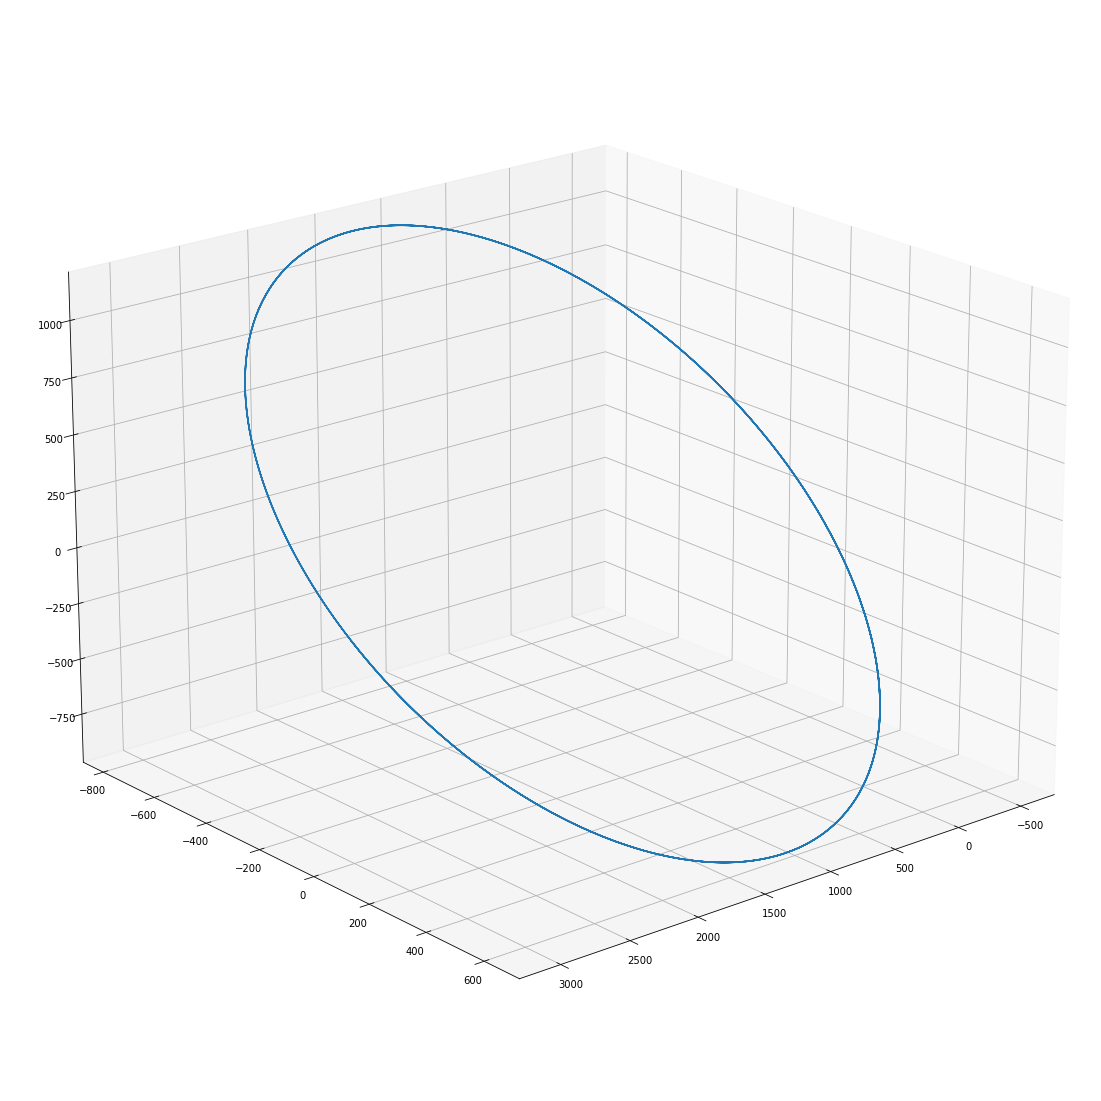

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches
from mpl_toolkits.mplot3d.axes3d import get_test_data
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1, projection='3d')
plt.plot(r12_x, r12_y, r12_z)
ax.view_init(elev=20, azim=50)
c = patches.Circle([0,0],1000)
ax.add_patch(c)

In [ ]:
df_states = pd.DataFrame(states)
df_states